In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')

train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [2]:
train_df['label'].value_counts()

,count
label,
0,29720
1,2242


In [3]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2025-08-04 05:18:02--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 42s  

2025-08-04 05:20:44 (5.08 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [4]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [5]:
import numpy as np
words = dict()
def add_to_dict(d, filename):
  with open(filename , 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue
add_to_dict(words, 'glove.6B.50d.txt')

In [6]:
len(words)

400000

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer.tokenize("@user when a father is dysfunctional and is @pass@!123")

['user',
 'when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'pass',
 '123']

In [9]:
from nltk.stem  import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]
  return useful_tokens
message_to_token_list("@user feet a fathers is dysfunctional inches is @password@123")

['user',
 'foot',
 'a',
 'father',
 'is',
 'dysfunctional',
 'inch',
 'is',
 'password',
 '123']

In [10]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue

    token_vector = word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float)

In [11]:
message_to_word_vectors("@user feet a fathers is dysfunctional inches is @password@123").shape

(10, 50)

In [12]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df)*0.7)
split_index_2 = int(len(train_df)*0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]
len(train_df), len(val_df), len(test_df)

(22373, 4794, 4795)

In [13]:
train_df

,id,label,tweet
0,267,0,i'll probably be 30 by the time @user comes ba...
1,20461,0,just finished recoding my audition for abc dic...
2,18134,0,"this will be dustin's bihday present, bihday dj,"
3,15418,0,"this is my ""do i really have to go to work fac..."
4,3078,0,eat the all #muslm
...,...,...,...
22368,24753,0,. #smiles..... it's simple really #christiana...
22369,17111,0,there is no secret here! we really are trying ...
22370,21880,0,@user one more exam left! #euro2016 #byesch...
22371,4883,0,what's a father's day without your papi?


In [14]:
def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:

    message_as_vector_seq = message_to_word_vectors(message)

    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1,50))

    all_word_vector_sequences.append(message_as_vector_seq)

  return all_word_vector_sequences, y

In [15]:
X_train, y_train = df_to_X_y(train_df)
print(len(X_train), len(X_train[0]))

22373 13


In [16]:
print(len(X_train), len(X_train[1]))

22373 8


55


(array([3.493e+03, 7.017e+03, 6.723e+03, 3.786e+03, 1.182e+03, 1.610e+02,
        7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <BarContainer object of 10 artists>)

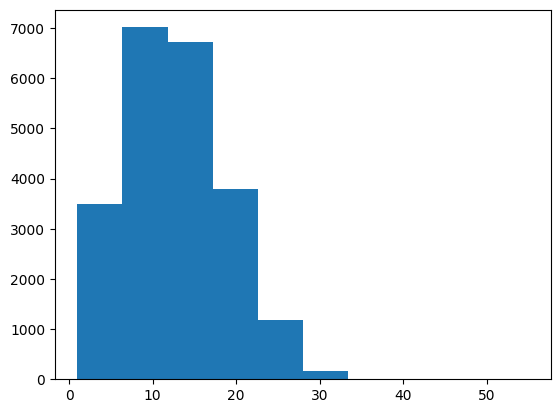

In [17]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

print(max(sequence_lengths))
import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [18]:
pd.Series(sequence_lengths).describe()

,0
count,22373.000000
mean,12.691727
std,5.930270
min,1.000000
25%,8.000000
50%,12.000000
75%,17.000000
max,55.000000


In [19]:
from copy import deepcopy

def pad_X(X, desired_sequence_length = 57):
  X_copy = deepcopy(X)
  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len

    pad = np.zeros(shape=(sequence_length_difference, 50))

    X_copy[i] = np.concatenate([x, pad])

  return np.array(X_copy).astype(float)

In [20]:
X_train = pad_X(X_train)
X_train.shape

(22373, 57, 50)

In [21]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((4794, 57, 50), (4794,))

In [22]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((4795, 57, 50), (4795,))

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(layers.Input(shape=(57, 50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 57, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3648)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,137 (387.25 KB)

 Trainable params: 99,137 (387.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/best_model.keras', save_best_only=True)
model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy',
              AUC(name='AUC')])

In [26]:
frequencies = pd.value_counts(train_df['label'])
frequencies

/tmp/ipython-input-3931351302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencies = pd.value_counts(train_df['label'])


,count
label,
0,20820
1,1553


In [27]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: np.float64(1.0745917387127761), 1: np.float64(14.406310367031551)}

In [28]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=cp, class_weight=weights)

Epoch 1/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - AUC: 0.7525 - accuracy: 0.7678 - loss: 1.1624 - val_AUC: 0.8832 - val_accuracy: 0.7196 - val_loss: 0.5512
Epoch 2/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - AUC: 0.8932 - accuracy: 0.7991 - loss: 0.8394 - val_AUC: 0.8982 - val_accuracy: 0.8796 - val_loss: 0.2863
Epoch 3/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - AUC: 0.9079 - accuracy: 0.8257 - loss: 0.7833 - val_AUC: 0.9063 - val_accuracy: 0.8427 - val_loss: 0.3525
Epoch 4/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - AUC: 0.9104 - accuracy: 0.8299 - loss: 0.7684 - val_AUC: 0.9091 - val_accuracy: 0.7820 - val_loss: 0.4688
Epoch 5/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - AUC: 0.9135 - accuracy: 0.8310 - loss: 0.7445 - val_AUC: 0.9137 - val_accuracy: 0.8045 - val_loss: 0.4193
Epoch 6/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - AUC: 0.9190 - accuracy: 0.8295 - loss: 0.7181 - val_AUC: 0.9156 - val_accuracy: 0.8390 - val_loss: 0.3683
Epoch 7/20
700/700 ━━━━━━━━━

In [29]:
from tensorflow.keras.models import load_model

model = load_model('model/best_model.keras')

In [32]:
test_predictions = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      4454
           1       0.41      0.81      0.54       341

    accuracy                           0.90      4795
   macro avg       0.70      0.86      0.74      4795
weighted avg       0.94      0.90      0.92      4795

